In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [2]:
# LABELED DATA (4 points with labels)
X_labeled = torch.tensor([
    [0.1, 0.2],   # Class 0
    [0.2, 0.1],   # Class 0
    [0.8, 0.9],   # Class 1
    [0.9, 0.8],   # Class 1
], dtype=torch.float32)

y_labeled = torch.tensor([[0.0], [0.0], [1.0], [1.0]], dtype=torch.float32)

# UNLABELED DATA (4 points without labels)
X_unlabeled = torch.tensor([
    [0.15, 0.25],  # Should be Class 0
    [0.3, 0.2],    # Should be Class 0
    [0.7, 0.85],   # Should be Class 1
    [0.85, 0.75],  # Should be Class 1
], dtype=torch.float32)

print("Labeled Data:")
print("X_labeled shape:", X_labeled.shape)
print("y_labeled shape:", y_labeled.shape)
print("\nUnlabeled Data:")
print("X_unlabeled shape:", X_unlabeled.shape)

Labeled Data:
X_labeled shape: torch.Size([4, 2])
y_labeled shape: torch.Size([4, 1])

Unlabeled Data:
X_unlabeled shape: torch.Size([4, 2])


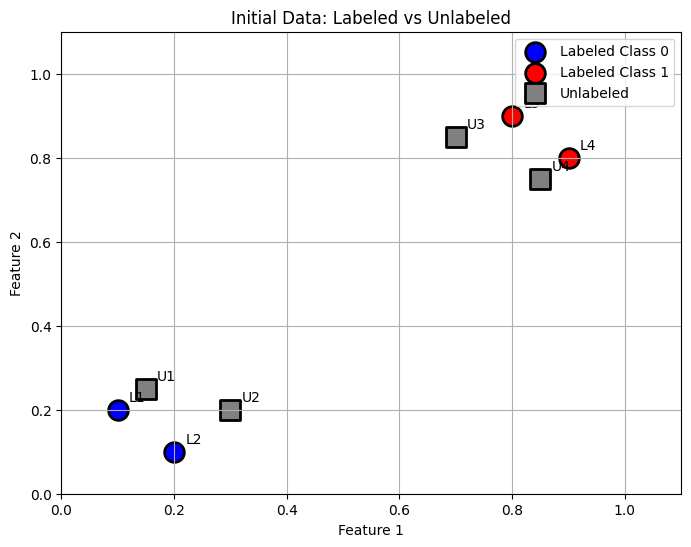

In [3]:
# Visualize the data
plt.figure(figsize=(8, 6))

# Plot labeled data
class_0 = X_labeled[y_labeled.flatten() == 0]
class_1 = X_labeled[y_labeled.flatten() == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', s=200, marker='o', 
            label='Labeled Class 0', edgecolors='black', linewidth=2)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', s=200, marker='o', 
            label='Labeled Class 1', edgecolors='black', linewidth=2)

# Plot unlabeled data
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], c='gray', s=200, marker='s', 
            label='Unlabeled', edgecolors='black', linewidth=2)

# Add point labels
for i, point in enumerate(X_labeled):
    plt.annotate(f'L{i+1}', (point[0]+0.02, point[1]+0.02), fontsize=10)
for i, point in enumerate(X_unlabeled):
    plt.annotate(f'U{i+1}', (point[0]+0.02, point[1]+0.02), fontsize=10)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Initial Data: Labeled vs Unlabeled')
plt.legend()
plt.grid(True)
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.show()

In [4]:
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + torch.exp(-z))

def predict(X, W, b):
    """Forward pass: compute probability"""
    z = torch.matmul(X, W) + b
    return sigmoid(z)

def binary_cross_entropy(y_true, y_pred):
    """Binary Cross-Entropy Loss"""
    epsilon = 1e-7  # Small value to avoid log(0)
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    loss = -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss

def compute_gradients(X, y_true, y_pred):
    """
    Compute gradients for logistic regression.
    dL/dW = X^T * (y_pred - y_true) / n
    dL/db = mean(y_pred - y_true)
    """
    n = X.shape[0]
    error = y_pred - y_true
    dW = torch.matmul(X.T, error) / n
    db = torch.mean(error)
    return dW, db

print("Logistic Regression functions defined!")

Logistic Regression functions defined!


In [5]:
def train_logistic_regression(X, y, W, b, learning_rate=0.5, epochs=100, verbose=False):
    """
    Train logistic regression using gradient descent.
    
    Args:
        X: Training features
        y: Training labels
        W: Initial weights
        b: Initial bias
        learning_rate: Learning rate
        epochs: Number of training epochs
        verbose: Print training progress
    
    Returns:
        W, b: Trained weights and bias
        losses: List of losses during training
    """
    losses = []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred = predict(X, W, b)
        
        # Compute loss
        loss = binary_cross_entropy(y, y_pred)
        losses.append(loss.item())
        
        # Backward pass
        dW, db = compute_gradients(X, y, y_pred)
        
        # Update weights
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        if verbose and epoch % 20 == 0:
            print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f}")
    
    return W, b, losses

print("Training function defined!")

Training function defined!


In [6]:
# Initialize weights
input_dim = X_labeled.shape[1]
W = torch.zeros(input_dim, 1)
b = torch.zeros(1)

print("Initial weights:")
print(f"W: {W.flatten().tolist()}")
print(f"b: {b.item()}")

# Train on labeled data only
print("\n" + "="*50)
print("Training on LABELED data only:")
print("="*50)

W, b, losses = train_logistic_regression(
    X_labeled, y_labeled, W, b, 
    learning_rate=1.0, epochs=100, verbose=True
)

print(f"\nFinal weights after training on labeled data:")
print(f"W: {W.flatten().tolist()}")
print(f"b: {b.item():.4f}")

Initial weights:
W: [0.0, 0.0]
b: 0.0

Training on LABELED data only:
Epoch   0 | Loss: 0.6931
Epoch  20 | Loss: 0.2725
Epoch  40 | Loss: 0.1578
Epoch  60 | Loss: 0.1085
Epoch  80 | Loss: 0.0820

Final weights after training on labeled data:
W: [3.88700532913208, 3.88700532913208]
b: -3.6313


In [7]:
# Predict probabilities for unlabeled data
unlabeled_probs = predict(X_unlabeled, W, b)

print("Predictions for UNLABELED data:")
print("="*50)
for i in range(len(X_unlabeled)):
    prob = unlabeled_probs[i].item()
    predicted_class = 1 if prob > 0.5 else 0
    confidence = prob if predicted_class == 1 else (1 - prob)
    print(f"U{i+1} {X_unlabeled[i].tolist()} → P(class=1): {prob:.4f} → Predicted: {predicted_class} (confidence: {confidence:.4f})")

Predictions for UNLABELED data:
U1 [0.15000000596046448, 0.25] → P(class=1): 0.1114 → Predicted: 0 (confidence: 0.8886)
U2 [0.30000001192092896, 0.20000000298023224] → P(class=1): 0.1561 → Predicted: 0 (confidence: 0.8439)
U3 [0.699999988079071, 0.8500000238418579] → P(class=1): 0.9163 → Predicted: 1 (confidence: 0.9163)
U4 [0.8500000238418579, 0.75] → P(class=1): 0.9301 → Predicted: 1 (confidence: 0.9301)


In [8]:
def self_training(X_labeled, y_labeled, X_unlabeled, threshold=0.8, 
                  learning_rate=1.0, epochs_per_iter=100, max_iterations=10):
    """
    Self-Training Semi-Supervised Learning.
    
    Args:
        X_labeled: Labeled features
        y_labeled: Labels
        X_unlabeled: Unlabeled features
        threshold: Confidence threshold for pseudo-labeling
        learning_rate: Learning rate for logistic regression
        epochs_per_iter: Training epochs per iteration
        max_iterations: Maximum self-training iterations
    
    Returns:
        W, b: Final trained weights
        X_labeled_final: Final labeled dataset
        y_labeled_final: Final labels
        history: Training history
    """
    # Copy data (to avoid modifying original)
    X_L = X_labeled.clone()
    y_L = y_labeled.clone()
    X_U = X_unlabeled.clone()
    
    # Initialize weights
    input_dim = X_L.shape[1]
    W = torch.zeros(input_dim, 1)
    b = torch.zeros(1)
    
    history = []
    
    for iteration in range(max_iterations):
        print(f"\n{'='*60}")
        print(f"ITERATION {iteration + 1}")
        print(f"{'='*60}")
        print(f"Labeled samples: {len(X_L)}, Unlabeled samples: {len(X_U)}")
        print(f"Current weights - W: {W.flatten().tolist()}, b: {b.item():.4f}")
        
        # Check if no unlabeled data left
        if len(X_U) == 0:
            print("No more unlabeled data. Training final model...")
            W, b, losses = train_logistic_regression(
                X_L, y_L, W, b, learning_rate, epochs_per_iter, verbose=False
            )
            break
        
        # Step 1: PREDICT on unlabeled data using CURRENT weights (before training)
        print(f"\nStep 1: Predicting unlabeled data with current weights...")
        probs = predict(X_U, W, b)
        
        # Step 2: Find samples with confidence > threshold
        # Confidence = prob if predicting class 1, (1-prob) if predicting class 0
        confidences = torch.where(probs > 0.5, probs, 1 - probs)
        high_confidence_mask = (confidences >= threshold).flatten()
        
        print(f"\nStep 2: Checking threshold ({threshold})...")
        print(f"Unlabeled predictions:")
        for i in range(len(X_U)):
            prob = probs[i].item()
            conf = confidences[i].item()
            above_threshold = "✓ INCLUDE IN TRAINING" if conf >= threshold else "✗ Below threshold"
            print(f"  Sample {i+1}: P(class=1)={prob:.4f}, confidence={conf:.4f} {above_threshold}")
        
        # Count samples above threshold
        n_above_threshold = high_confidence_mask.sum().item()
        print(f"\nSamples to include: {n_above_threshold}")
        
        if n_above_threshold == 0:
            print("No samples exceed threshold. Stopping self-training.")
            # Final training on current labeled data
            W, b, losses = train_logistic_regression(
                X_L, y_L, W, b, learning_rate, epochs_per_iter, verbose=False
            )
            break
        
        # Step 3: Add high-confidence samples to labeled set with pseudo-labels
        print(f"\nStep 3: Adding pseudo-labeled samples to training set...")
        high_conf_indices = torch.where(high_confidence_mask)[0]
        
        for idx in high_conf_indices:
            # Get the sample
            sample = X_U[idx].unsqueeze(0)
            prob = probs[idx].item()
            
            # Assign pseudo-label based on prediction
            pseudo_label = torch.tensor([[1.0]]) if prob > 0.5 else torch.tensor([[0.0]])
            
            # Add to labeled set
            X_L = torch.cat([X_L, sample], dim=0)
            y_L = torch.cat([y_L, pseudo_label], dim=0)
            
            print(f"  Added sample with pseudo-label {int(pseudo_label.item())}")
        
        # Remove added samples from unlabeled set
        low_conf_indices = torch.where(~high_confidence_mask)[0]
        if len(low_conf_indices) > 0:
            X_U = X_U[low_conf_indices]
        else:
            X_U = torch.tensor([]).reshape(0, input_dim)
        
        # Step 4: TRAIN on labeled + pseudo-labeled data to get NEW weights
        print(f"\nStep 4: Training on {len(X_L)} samples (labeled + pseudo-labeled)...")
        W, b, losses = train_logistic_regression(
            X_L, y_L, W, b, learning_rate, epochs_per_iter, verbose=False
        )
        print(f"Training complete. Final loss: {losses[-1]:.4f}")
        print(f"New weights - W: {W.flatten().tolist()}, b: {b.item():.4f}")
        
        # Store history
        history.append({
            'iteration': iteration + 1,
            'n_labeled': len(X_L),
            'n_unlabeled': len(X_U),
            'n_added': n_above_threshold,
            'loss': losses[-1]
        })
    
    return W, b, X_L, y_L, history

print("Self-training function defined!")

Self-training function defined!


In [9]:
# Set threshold for pseudo-labeling
THRESHOLD = 0.75  # Only add samples with >75% confidence

print("Starting Self-Training...")
print(f"Initial labeled samples: {len(X_labeled)}")
print(f"Initial unlabeled samples: {len(X_unlabeled)}")
print(f"Confidence threshold: {THRESHOLD}")

# Run self-training
W_final, b_final, X_labeled_final, y_labeled_final, history = self_training(
    X_labeled, y_labeled, X_unlabeled,
    threshold=THRESHOLD,
    learning_rate=1.0,
    epochs_per_iter=100,
    max_iterations=10
)

Starting Self-Training...
Initial labeled samples: 4
Initial unlabeled samples: 4
Confidence threshold: 0.75

ITERATION 1
Labeled samples: 4, Unlabeled samples: 4
Current weights - W: [0.0, 0.0], b: 0.0000

Step 1: Predicting unlabeled data with current weights...

Step 2: Checking threshold (0.75)...
Unlabeled predictions:
  Sample 1: P(class=1)=0.5000, confidence=0.5000 ✗ Below threshold
  Sample 2: P(class=1)=0.5000, confidence=0.5000 ✗ Below threshold
  Sample 3: P(class=1)=0.5000, confidence=0.5000 ✗ Below threshold
  Sample 4: P(class=1)=0.5000, confidence=0.5000 ✗ Below threshold

Samples to include: 0
No samples exceed threshold. Stopping self-training.


In [10]:
print("\n" + "="*60)
print("SELF-TRAINING SUMMARY")
print("="*60)

print(f"\nInitial labeled samples: {len(X_labeled)}")
print(f"Final labeled samples: {len(X_labeled_final)}")
print(f"Samples added via pseudo-labeling: {len(X_labeled_final) - len(X_labeled)}")

print(f"\nFinal Model Parameters:")
print(f"W: {W_final.flatten().tolist()}")
print(f"b: {b_final.item():.4f}")

print("\nFinal Labeled Dataset:")
print("-" * 40)
for i in range(len(X_labeled_final)):
    label_type = "Original" if i < len(X_labeled) else "Pseudo"
    print(f"  {X_labeled_final[i].tolist()} → Class {int(y_labeled_final[i].item())} ({label_type})")


SELF-TRAINING SUMMARY

Initial labeled samples: 4
Final labeled samples: 4
Samples added via pseudo-labeling: 0

Final Model Parameters:
W: [3.88700532913208, 3.88700532913208]
b: -3.6313

Final Labeled Dataset:
----------------------------------------
  [0.10000000149011612, 0.20000000298023224] → Class 0 (Original)
  [0.20000000298023224, 0.10000000149011612] → Class 0 (Original)
  [0.800000011920929, 0.8999999761581421] → Class 1 (Original)
  [0.8999999761581421, 0.800000011920929] → Class 1 (Original)


In [11]:
if len(history) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    iterations = [h['iteration'] for h in history]
    n_labeled = [h['n_labeled'] for h in history]
    n_unlabeled = [h['n_unlabeled'] for h in history]
    
    # Plot labeled vs unlabeled over iterations
    axes[0].plot(iterations, n_labeled, 'b-o', label='Labeled', linewidth=2)
    axes[0].plot(iterations, n_unlabeled, 'r-o', label='Unlabeled', linewidth=2)
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Number of Samples')
    axes[0].set_title('Labeled vs Unlabeled Samples Over Iterations')
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot samples added per iteration
    n_added = [h['n_added'] for h in history]
    axes[1].bar(iterations, n_added, color='green', edgecolor='black')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Samples Added')
    axes[1].set_title('Pseudo-Labeled Samples Added Per Iteration')
    axes[1].grid(True, axis='y')
    
    plt.tight_layout()
    plt.show()
else:
    print("All samples were labeled in the first iteration!")

All samples were labeled in the first iteration!


In [12]:
# Test on all original data (labeled + unlabeled)
X_all = torch.cat([X_labeled, X_unlabeled], dim=0)

# Get predictions
all_probs = predict(X_all, W_final, b_final)
all_predictions = (all_probs > 0.5).float()

print("Final Predictions for ALL Data:")
print("="*60)
print(f"{'Data Point':<20} {'Probability':<15} {'Predicted':<10}")
print("-"*60)

for i in range(len(X_all)):
    point_type = "Labeled" if i < len(X_labeled) else "Unlabeled"
    point_name = f"L{i+1}" if i < len(X_labeled) else f"U{i+1-len(X_labeled)}"
    prob = all_probs[i].item()
    pred = int(all_predictions[i].item())
    print(f"{point_name} ({point_type}): {X_all[i].tolist()}  P={prob:.4f}  → Class {pred}")

Final Predictions for ALL Data:
Data Point           Probability     Predicted 
------------------------------------------------------------
L1 (Labeled): [0.10000000149011612, 0.20000000298023224]  P=0.0783  → Class 0
L2 (Labeled): [0.20000000298023224, 0.10000000149011612]  P=0.0783  → Class 0
L3 (Labeled): [0.800000011920929, 0.8999999761581421]  P=0.9515  → Class 1
L4 (Labeled): [0.8999999761581421, 0.800000011920929]  P=0.9515  → Class 1
U1 (Unlabeled): [0.15000000596046448, 0.25]  P=0.1114  → Class 0
U2 (Unlabeled): [0.30000001192092896, 0.20000000298023224]  P=0.1561  → Class 0
U3 (Unlabeled): [0.699999988079071, 0.8500000238418579]  P=0.9163  → Class 1
U4 (Unlabeled): [0.8500000238418579, 0.75]  P=0.9301  → Class 1


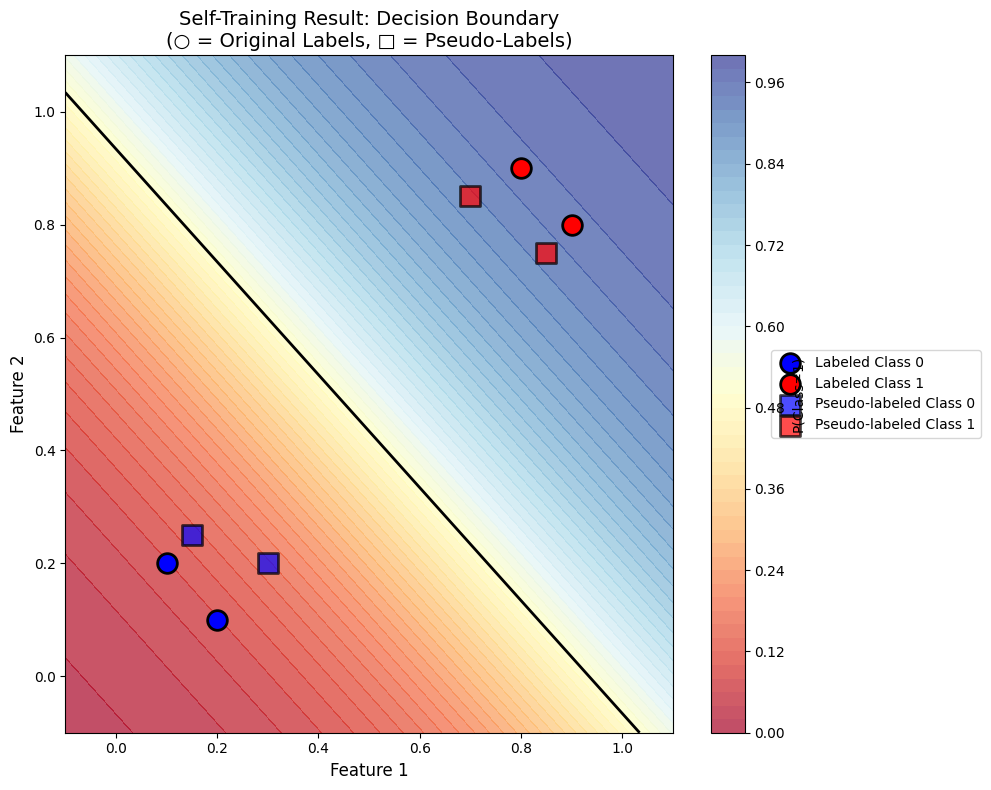


✓ Self-Training successfully used unlabeled data to improve the model!


In [13]:
# Create mesh grid
x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Get predictions for grid
grid_input = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
grid_probs = predict(grid_input, W_final, b_final)
grid_probs = grid_probs.numpy().reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))

# Decision boundary
plt.contourf(xx, yy, grid_probs, levels=50, cmap='RdYlBu', alpha=0.7)
plt.colorbar(label='P(Class=1)')

# Decision boundary line (where P=0.5)
plt.contour(xx, yy, grid_probs, levels=[0.5], colors='black', linewidths=2)

# Plot original labeled data
class_0 = X_labeled[y_labeled.flatten() == 0]
class_1 = X_labeled[y_labeled.flatten() == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', s=200, marker='o', 
            label='Labeled Class 0', edgecolors='black', linewidth=2)
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', s=200, marker='o', 
            label='Labeled Class 1', edgecolors='black', linewidth=2)

# Plot originally unlabeled data (now pseudo-labeled)
unlabeled_preds = (predict(X_unlabeled, W_final, b_final) > 0.5).flatten()
unlabeled_0 = X_unlabeled[~unlabeled_preds]
unlabeled_1 = X_unlabeled[unlabeled_preds]

if len(unlabeled_0) > 0:
    plt.scatter(unlabeled_0[:, 0], unlabeled_0[:, 1], c='blue', s=200, marker='s', 
                label='Pseudo-labeled Class 0', edgecolors='black', linewidth=2, alpha=0.7)
if len(unlabeled_1) > 0:
    plt.scatter(unlabeled_1[:, 0], unlabeled_1[:, 1], c='red', s=200, marker='s', 
                label='Pseudo-labeled Class 1', edgecolors='black', linewidth=2, alpha=0.7)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Self-Training Result: Decision Boundary\n(○ = Original Labels, □ = Pseudo-Labels)', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
plt.tight_layout()
plt.show()

print("\n✓ Self-Training successfully used unlabeled data to improve the model!")